In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
raw_data = pd.read_csv('Cancer_Data.csv')
# raw_data.head()
# raw_data['Unnamed: 32'].info()
# raw_data.fractal_dimension_worst
# raw_data['Unnamed:32']
# raw_data.set_index('id')
raw_data_1 = raw_data.copy()
# raw_data_1['Unnamed: 32'] = raw_data_1['Unnamed: 32'].astype(str)
# print(raw_data_1.iloc[1,32])
null_mask = raw_data_1['Unnamed: 32'].isnull()
if null_mask.all():
    print('Unnamed: 32 ==> all NULL')
else :
    print(str(null_mask.sum())+'out of '+str(raw_data.shape[0])+'are NULL')
#Unnamed: 32 ==> totally useless ==> drop it!
raw_data_1.drop(['Unnamed: 32'], axis=1, inplace=True)
raw_data_1

Unnamed: 32 ==> all NULL


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [61]:
# for i in raw_data_1.columns:
#     print(i)
# radius_mean
# texture_mean
# perimeter_mean
# area_mean
# smoothness_mean
# compactness_mean
# concavity_mean
# concave points_mean
# symmetry_mean
# fractal_dimension_mean
for i in range(10):
    print("radius:  "+str(raw_data_1.iloc[i, :]['radius_worst'])+'\t'+str(raw_data_1.iloc[i, :]['radius_mean'])+'\t'+str(raw_data_1.iloc[i, :]['radius_se']))
    print("texture:  "+str(raw_data_1.iloc[i, :]['texture_worst'])+'\t'+str(raw_data_1.iloc[i, :]['texture_mean'])+'\t'+str(raw_data_1.iloc[i, :]['texture_se'])+'\n')

radius:  25.38	17.99	1.095
texture:  17.33	10.38	0.9053

radius:  24.99	20.57	0.5435
texture:  23.41	17.77	0.7339

radius:  23.57	19.69	0.7456
texture:  25.53	21.25	0.7869

radius:  14.91	11.42	0.4956
texture:  26.5	20.38	1.156

radius:  22.54	20.29	0.7572
texture:  16.67	14.34	0.7813

radius:  15.47	12.45	0.3345
texture:  23.75	15.7	0.8902

radius:  22.88	18.25	0.4467
texture:  27.66	19.98	0.7732

radius:  17.06	13.71	0.5835
texture:  28.14	20.83	1.377

radius:  15.49	13.0	0.3063
texture:  30.73	21.82	1.002

radius:  15.09	12.46	0.2976
texture:  40.68	24.04	1.599



In [67]:
raw_data_1.describe() 
raw_data_1.info()
target_df = raw_data_1['diagnosis']
figure_df = raw_data_1.drop(['diagnosis'], axis=1)
target_df.head()
figure_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


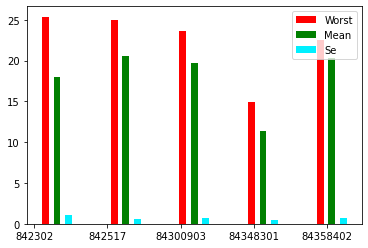

In [115]:
means = figure_df.head()['radius_mean']
worsts = figure_df.head()['radius_worst']
ses = figure_df.head()['radius_se']
labels = figure_df.head()['id']
labels_pos = np.arange(len(labels))
# print(labels_pos)
# print(labels)

plt.xticks(labels_pos*3.2,labels)
plt.bar(labels_pos*3+0.5, worsts, color='red', width=.3, label='Worst')
plt.bar(labels_pos*3+1., means, color='green', width=.3, label='Mean')
plt.bar(labels_pos*3+1.5, ses, color='#00f0ff', width=.3, label='Se')
# plt.figure(figsize=(16, 4))
plt.legend(loc='upper right')
plt.show()
# plt.bar(i*3+1, figure_df.iloc[i,:]['radius_mean'], color='gray', width=.2)
# plt.bar(i*3+1.5, figure_df.iloc[i,:]['radius_se'],color='blue', width=.3)
# # plt.xticks(str(figure_df.iloc[i,:]['id']))
# plt.gca().set_xticklabels(labels_pos*3.2, rotation=0.8, ha='center')

In [116]:
target_df.replace(['M', 'B'], [1, 0], inplace=True)
target_df

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

<AxesSubplot:>

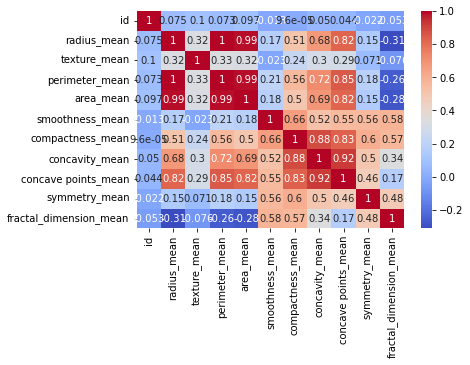

In [124]:
sub_mean_df = figure_df[['id','radius_mean',
                   'texture_mean',
                   'perimeter_mean',
                   'area_mean',
                   'smoothness_mean',
                   'compactness_mean',
                   'concavity_mean',
                   'concave points_mean',
                   'symmetry_mean',
                   'fractal_dimension_mean']]

# sub_mean_df.rename(columns=['id','radius','texture','perimeter','area','smoothness','compactness','concavity','concave points','symmetry','fractal_dimension'], inplace=True)

# sub_df
corr = sub_mean_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [131]:
#area-radius => dauh!(this one is obvious)
#perimeter-area 

#concavity-concave points
#compactness-concavity

#texture, symmetry, fractal_dimension are less important!

area = sub_mean_df['area_mean']
perimeter = sub_mean_df['perimeter_mean']
radius = sub_mean_df['radius_mean']
concavity = sub_mean_df['concavity_mean']
concave_points = sub_mean_df['concave points_mean']
compactness = sub_mean_df['compactness_mean']

frame1 = pd.concat([compactness,concave_points,concavity],ignore_index=True, axis=1)
frame2 = pd.concat([radius,perimeter,area],ignore_index=True, axis=1)


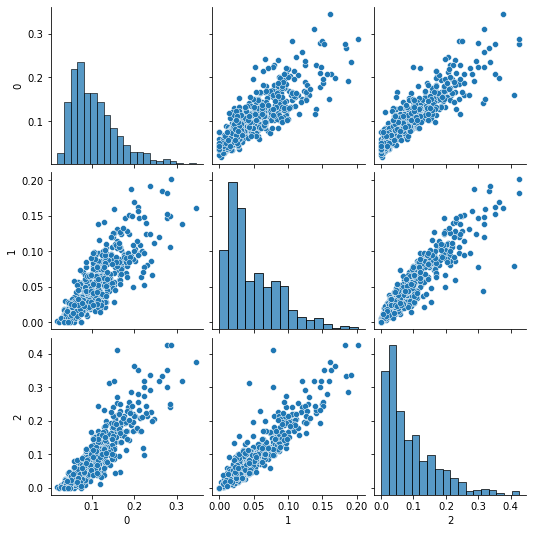

In [132]:
sns.pairplot(frame1)

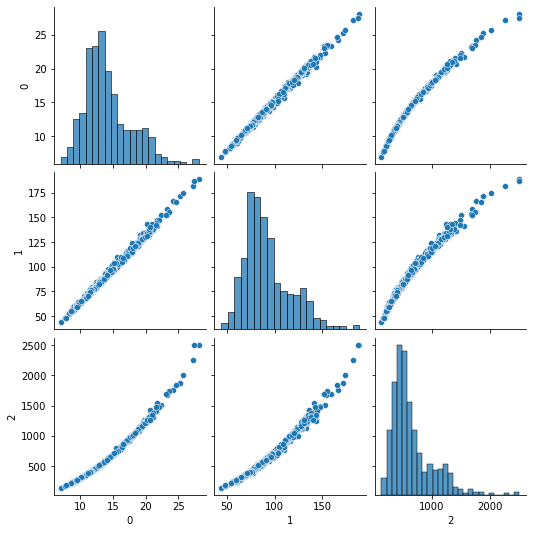

In [133]:
sns.pairplot(frame2)

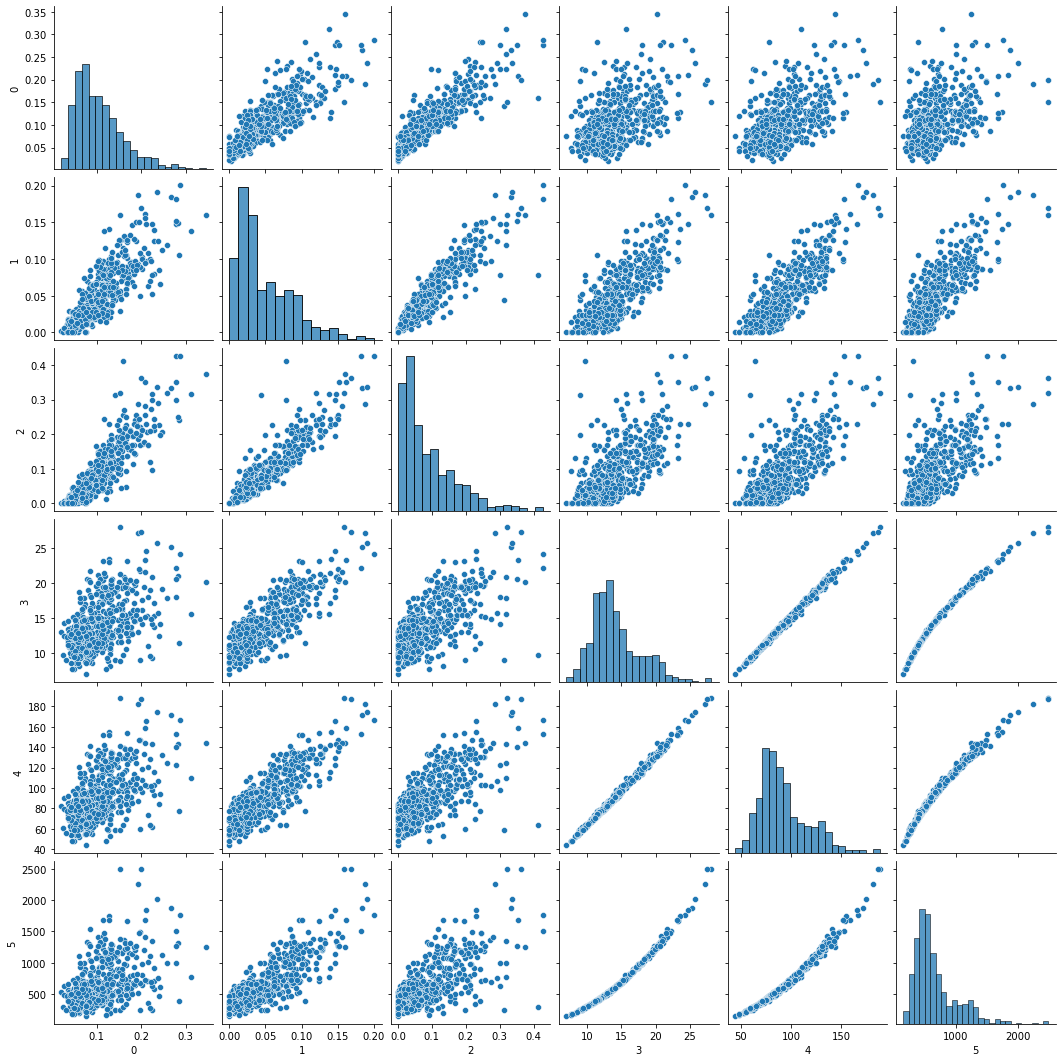

In [135]:
frame3 = pd.concat([frame1, frame2],ignore_index=True, axis=1)
sns.pairplot(frame3)

In [ ]:
#perimeter-compactness-radius have remarkable relationships